In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [3]:
df = pd.read_csv("virat.csv")

In [4]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [5]:
## Your code here
df.info()
df['Runs'] = df['Runs'].apply(lambda x: int(str(x).replace('*','')))
df['Runs'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


Runs
0      10
2       6
1       5
31      4
9       4
       ..
154     1
45      1
65      1
122     1
55      1
Name: count, Length: 75, dtype: int64

In [6]:
p50 = np.percentile(df['Runs'], 50)
p25 = np.percentile(df['Runs'], 25)
print(p50 - p25)

22.5


#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


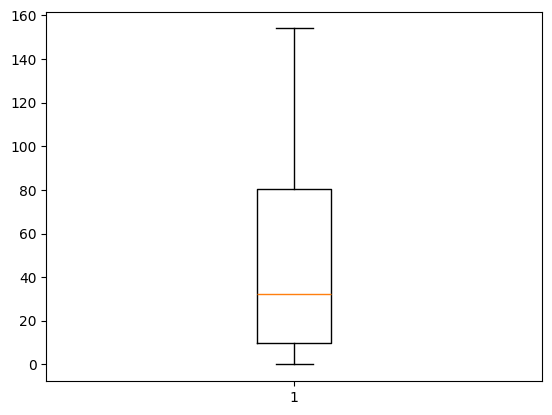

In [7]:
#Your code here
plt.boxplot(df['Runs'])
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [14]:
## Your code here

# I - Virat has played the maximum number of matches in 2011

df['Start Date'] = pd.to_datetime(df['Start Date'])
matches_by_year = df.groupby(df['Start Date'].dt.year)['Inns'].count()
print("Number of matches played each year:")
print(matches_by_year)
# idxmax() returns the index label of the maximum value in a Series
# In this case, it returns the year with the highest number of matches
print("\nYear with maximum matches:", matches_by_year.idxmax())
print("Maximum matches played:", matches_by_year.max())


Number of matches played each year:
Start Date
2008     5
2009     6
2010    16
2011    31
2012    11
2013    23
2014    17
2015    10
2016    10
2017     3
Name: Inns, dtype: int64

Year with maximum matches: 2011
Maximum matches played: 31


In [15]:
# II - Virat has the highest run average in the year 2017
runs_by_year = df.groupby(df['Start Date'].dt.year)['Runs'].mean()
print("\nRun averages by year:")
print(runs_by_year)
print("\nYear with highest average:", runs_by_year.idxmax())
print("Highest average:", runs_by_year.max())




Run averages by year:
Start Date
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64

Year with highest average: 2016
Highest average: 73.9


In [17]:
# III - Virat has the maximum score in a single match and the highest run average in the year 2016.
# Get maximum score in a single match
max_score = df['Runs'].max()
print("\nMaximum score in a single match:", max_score)

# Get runs average for 2016
runs_2016 = df[df['Start Date'].dt.year == 2016]
avg_2016 = runs_2016['Runs'].mean()
print("\n2016 run average:", avg_2016)

# Check if 2016 had the highest average
yearly_avgs = df.groupby(df['Start Date'].dt.year)['Runs'].mean()
max_avg_year = yearly_avgs.idxmax()
print("\nYear with highest average:", max_avg_year)
print("Highest average:", yearly_avgs.max())



Maximum score in a single match: 154

2016 run average: 73.9

Year with highest average: 2016
Highest average: 73.9


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

D - [1, 14.4)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)D - [1, 14.4)


C:\Users\BAVISKAR\AppData\Local\Temp\ipykernel_9864\576810857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


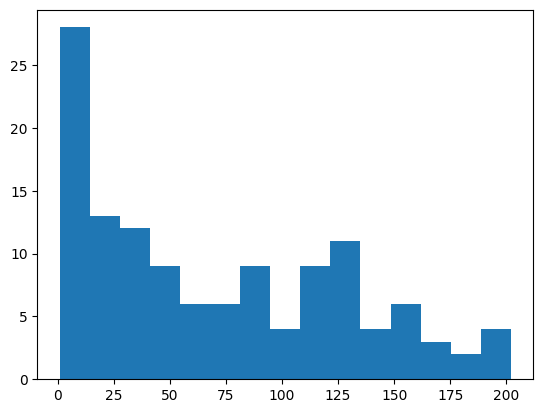

In [32]:
#Your code here
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))
plt.hist(df2.Mins, bins = 15)
plt.show()
